# MODELOS SIMPLES

## Regresión Logística Multinomial (Softmax)

## 1. Preparación de los datos

Como vimos en el EDA, las imágenes son de $28 \times 28$. Para un modelo lineal, debemos "aplanarlas" (flatten) a un vector de $784$ dimensiones.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# 1. Carga de datos
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# 2. Normalización
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 3. División Entrenamiento / Validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train shape: (48000, 28, 28), y_train shape: (48000,)
X_val shape: (12000, 28, 28), y_val shape: (12000,)
X_test shape: (10000, 28, 28), y_test shape: (10000,)


## 2. Definición del Modelo Softmax

La función de activación Softmax para $K$ clases se define como:

$$\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$$

Utilizaremos la función de pérdida Sparse Categorical Cross-Entropy:

$$\mathcal{L} = -\sum_{i=1}^K y_i \log(\hat{y}_i)$$

In [ ]:
def build_linear_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)), # Aplanamos la entrada X
        layers.Dense(10, activation='softmax') # Una sola capa densa = Modelo lineal
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_linear = build_linear_model()
model_linear.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Entrenamiento y Curvas

Vamos a ver si el modelo converge.

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7288 - loss: 0.8097 - val_accuracy: 0.8341 - val_loss: 0.4870
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8372 - loss: 0.4825 - val_accuracy: 0.8478 - val_loss: 0.4432
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8452 - loss: 0.4456 - val_accuracy: 0.8540 - val_loss: 0.4228
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8524 - loss: 0.4327 - val_accuracy: 0.8572 - val_loss: 0.4193
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8526 - loss: 0.4225 - val_accuracy: 0.8566 - val_loss: 0.4152
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8576 - loss: 0.4146 - val_accuracy: 0.8593 - val_loss: 0.4110
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8603 - loss: 0.4079 - val_accuracy: 0.8562 - val_loss: 0.4149
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8605 - loss: 0.4032 - 

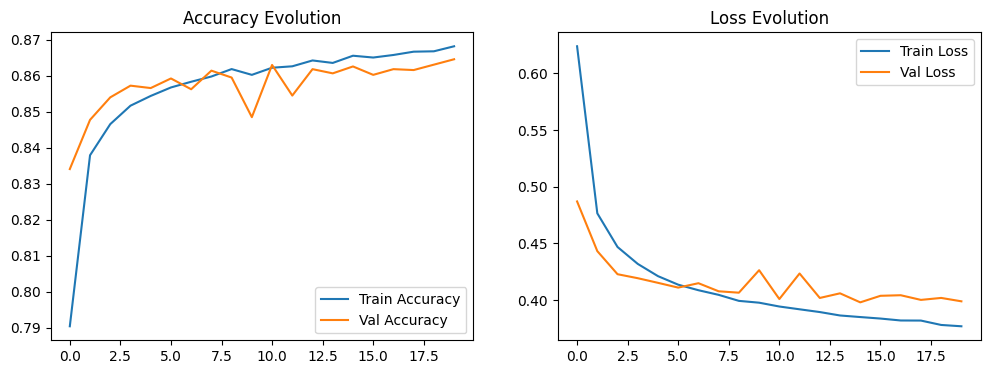

In [ ]:
history = model_linear.fit(X_train, y_train,
                           epochs=20,
                           batch_size=32,
                           validation_data=(X_val, y_val),
                           verbose=1)

# Visualización de curvas
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Evolution')
plt.legend()
plt.show()

El modelo aprende lo más importante en las primeras 10 épocas. A partir de ahí, la ganancia en accuracy es mínima, lo que es típico de los modelos lineales: una vez encuentran el hiperplano óptimo, no tienen "capacidad" para seguir mejorando.

Las curvas son muy estables. No hay saltos bruscos en la val_loss, lo que indica que el factor de aprendizaje (learning rate) de Adam es adecuado para este problema.

El overfitting es casi inexistente(Train Acc: ~86.99%, Val Acc: ~86.18%), es decir, la diferencia es de menos del 1%. Esto confirma que el modelo no está memorizando ruido, sino aprendiendo patrones generales. Es un modelo muy robusto pero con un "techo" de aprendizaje bajo.


## 4. Evaluación Final

In [ ]:
train_loss, train_acc = model_linear.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model_linear.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model_linear.evaluate(X_test, y_test, verbose=0)

n_params = model_linear.count_params()

print(f"Resultados finales:")
print(f" - Train Acc: {train_acc:.4f}")
print(f" - Val Acc:   {val_acc:.4f}")
print(f" - Test Acc:  {test_acc:.4f}")
print(f" - Parámetros: {n_params}")

Resultados finales:
 - Train Acc: 0.8700
 - Val Acc:   0.8618
 - Test Acc:  0.8451
 - Parámetros: 7850


## Resumen de Resultados - Modelo Lineal

| Modelo | Parámetros | Train Acc | Val Acc | Test Acc |
| :--- | :---: | :---: | :---: | :---: |
| **Softmax (Baseline)** | 7,850 | 0.8700 | 0.8618 | **0.8451** |

Hemos implementado el modelo más básico posible, donde cada píxel se conecta directamente a la salida.

Tenemos 7,850 parámetros. Es un modelo "ligero" que busca fronteras de decisión lineales (hiperplanos).

Hay poco overfitting (brecha < 3%). El modelo generaliza bien, pero tiene un "techo" de aprendizaje debido a su simplicidad.

El ~84% de acierto confirma que las clases son distinguibles por su silueta general, pero el modelo falla en prendas con formas similares (camisetas vs. camisas) porque no puede entender texturas o detalles complejos.